# EDA No.2 
AAA Project - Martin George   mgeorgevienna@gmail.com

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('member_sample_step_01.csv', index_col = 0)

# Application of classification model on AAA data

In [78]:
df.head()
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21344 entries, 10000003.0 to 28273400.0
Columns: 112 entries, Household Key to Date
dtypes: float64(34), int64(1), object(77)
memory usage: 18.4+ MB


Index(['Household Key', 'Member Flag', 'City', 'State - Grouped', 'ZIP5',
       'ZIP9', 'FSV CMSI Flag', 'FSV Credit Card Flag',
       'FSV Deposit Program Flag', 'FSV Home Equity Flag',
       ...
       'SC Vehicle Model Name', 'SVC Facility Name', 'SVC Facility Type',
       'Total Cost', 'Tow Destination Latitude', 'Tow Destination Longitude',
       'Tow Destination Name', 'Was Duplicated', 'Was Towed To AAR Referral',
       'Date'],
      dtype='object', length=112)

In [79]:
df.head()

,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,...,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral,Date
Individual Key,,,,,,,,,,,,,,,,,,,,,
10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,Y,N,N,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,41.0,-71.0,Aar / Johnson's Auto Service,0.0,1.0,2017-04-13
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,Y,N,N,...,CAMRY,Astro Wrecker Service,independent repair,30.0,0.0,0.0,NaN,0.0,0.0,2016-07-26
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,Y,N,N,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,32.5,0.0,0.0,NaN,0.0,0.0,2017-02-13
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,Y,N,N,...,CAMRY,ASTRO WRECKER SERVICE,independent repair,30.0,0.0,0.0,NaN,0.0,0.0,2015-01-29


In [80]:
df['City'].value_counts()[:3].sum()
df['City'].value_counts()

WARWICK                2815
CRANSTON               2742
PROVIDENCE             1690
NORTH PROVIDENCE        948
COVENTRY                778
JOHNSTON                703
EAST GREENWICH          641
PAWTUCKET               640
NORTH KINGSTOWN         637
WEST WARWICK            606
CUMBERLAND              560
NARRAGANSETT            531
WAKEFIELD               497
RIVERSIDE               436
LINCOLN                 402
EAST PROVIDENCE         372
PORTSMOUTH              328
MANVILLE                322
NEWPORT                 321
BARRINGTON              313
GREENVILLE              288
SMITHFIELD              284
BRISTOL                 279
MIDDLETOWN              272
RUMFORD                 268
WOONSOCKET              262
TIVERTON                253
NORTH SCITUATE          222
JAMESTOWN               218
NORTH SMITHFIELD        179
                       ... 
BRIDGEPORT                2
RICHMOND                  2
NORTH GROSVENORDALE       2
QUINEBAUG                 2
NEW MILFORD         

In [81]:
df['State - Grouped'].value_counts()

RI    20937
CT      407
Name: State - Grouped, dtype: int64

In [82]:
df['FSV Mortgage Flag'].value_counts()

N    21317
Y       27
Name: FSV Mortgage Flag, dtype: int64

A function to digitise the column

In [83]:
def y_n_to_binary(x):
    if x == 'Y':
        return 1
    else:
        return 0
    

In [84]:
df['FSV Mortgage Flag'] = df['FSV Mortgage Flag'].apply(y_n_to_binary)

In [85]:
df['FSV Mortgage Flag'].value_counts()

0    21317
1       27
Name: FSV Mortgage Flag, dtype: int64

In [86]:
#[for i in df.columns in i.startswith('Children')]

In [87]:
df['Children'].value_counts()

Yes    6631
No     5379
Name: Children, dtype: int64

In [88]:
df.groupby("Children")["Number of Children"]

In [89]:
df["Number of Children"]

Individual Key
10000003.0               NaN
52211550.0         One Child
52211550.0         One Child
52211550.0         One Child
52211550.0         One Child
52211550.0         One Child
52211550.0         One Child
52211550.0         One Child
52211550.0         One Child
52211550.0         One Child
1606764.0                NaN
2766867.0        No children
2766867.0        No children
2766867.0        No children
2766869.0        No children
2766868.0        No children
2766868.0        No children
2766868.0        No children
2766868.0        No children
2766868.0        No children
13746947.0       No children
1788453.0          One Child
1788452.0          One Child
1788452.0          One Child
1788452.0          One Child
1788452.0          One Child
1788455.0          One Child
14243585.0     Four Children
14243587.0    Three Children
14243587.0    Three Children
                   ...      
4458026.0                NaN
12849942.0         One Child
12849942.0         One Child

In [90]:
df.groupby('Children')['Number of Children'].value_counts()

Children  Number of Children
No        No children           5379
Yes       One Child             3871
          Two Children          1582
          Three Children         750
          Four Children          276
          No children            103
          Five Children           45
          Six Children             4
Name: Number of Children, dtype: int64

# Conclusion: Validity of data is required.  With the flag "Y" for children, still there are 103 records with "No Children"  description.

In [91]:
df['Number of Children'].value_counts()

No children       5482
One Child         3871
Two Children      1582
Three Children     750
Four Children      276
Five Children       45
Six Children         4
Name: Number of Children, dtype: int64

In [92]:
vals = df['Number of Children'].value_counts().index
print(vals)
nums = list(range(7))
nums

Index(['No children', 'One Child', 'Two Children', 'Three Children',
       'Four Children', 'Five Children', 'Six Children'],
      dtype='object')


[0, 1, 2, 3, 4, 5, 6]

# Converting string description of "no of children"  to an equivalent number value.

In [93]:
df['Number of Children'] = df['Number of Children'].map({v:n for v,n in zip(vals,nums)})

In [94]:
df[['Children','Number of Children']]

,Children,Number of Children
Individual Key,,
10000003.0,NaN,NaN
52211550.0,Yes,1.0
52211550.0,Yes,1.0
52211550.0,Yes,1.0
52211550.0,Yes,1.0
52211550.0,Yes,1.0
52211550.0,Yes,1.0
52211550.0,Yes,1.0
52211550.0,Yes,1.0


In [95]:
df.loc[(df['Number of Children'] == 0) & (df['Children'] == 'Yes')]

,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,...,SC Vehicle Model Name,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral,Date
Individual Key,,,,,,,,,,,,,,,,,,,,,
6286759.0,10625447.0,Y,CHARLESTOWN,RI,2813.0,28133901.0,0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30250103.0,5550046.0,Y,CUMBERLAND,RI,2864.0,28643545.0,0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30250103.0,5550046.0,Y,CUMBERLAND,RI,2864.0,28643545.0,0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10266781.0,10473088.0,Y,WARWICK,RI,2889.0,28896214.0,0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10125674.0,49275813.0,Y,CRANSTON,RI,2910.0,29103541.0,0,N,N,N,...,CR-V,Davis Towing,tow only facility,34.00,NaN,NaN,NaN,0.0,0.0,2019-07-06
10125674.0,49275813.0,Y,CRANSTON,RI,2910.0,29103541.0,0,N,N,N,...,CRV,Pat's Towing,tow only facility,32.00,0.00000,0.00000,NaN,0.0,0.0,2016-11-13
10125674.0,49275813.0,Y,CRANSTON,RI,2910.0,29103541.0,0,N,N,N,...,VIBE,AAA SNE RI FLEET FULL SERVICE,other,53.00,41.00000,-71.00000,*,0.0,0.0,2014-07-19
10125674.0,49275813.0,Y,CRANSTON,RI,2910.0,29103541.0,0,N,N,N,...,VIBE,AAA SNE RI FLEET FULL SERVICE,other,53.00,41.00000,-71.00000,Davies Service Center,0.0,0.0,2014-07-22
24070437.0,20249145.0,Y,WARWICK,RI,2886.0,28867529.0,0,N,N,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
for col in df.columns:
    print(col)

Household Key
Member Flag
City
State - Grouped
ZIP5
ZIP9
FSV CMSI Flag
FSV Credit Card Flag
FSV Deposit Program Flag
FSV Home Equity Flag
FSV ID Theft Flag
FSV Mortgage Flag
INS Client Flag
TRV Globalware Flag
Number of Children
Responded to Catalog
Race
Length Of Residence
Mail Responder
Home Owner
Income
Date Of Birth
Children
Education
Dwelling Type
Credit Ranges
Language
Gender
Active Expiration Date
Address Change Date
Bad Address Flag
Billing Code Description
Birth Date MMDDYYYY
Branch Name
Cancel Date
Cancel Reason
County
Do Not Direct Mail Solicit
Email Available
Email Status
ERS ENT Count Year 1
ERS ENT Count Year 2
ERS ENT Count Year 3
ERS Member Cost Year 1
ERS Member Cost Year 2
ERS Member Cost Year 3
Right_Gender
Right_Individual Key
Join AAA Date
Join Club Date
Member Key
Member Map Location
Member Number Associate ID
Member Phone Type
Member Status
Member Tenure Years
Member Type
Membership ID
Months from Join to Cancel
Opt-Out - Publication
Reason Joined
Reinstate Date


In [97]:
df['Birth Date MMDDYYYY']

Individual Key
10000003.0                    NaN
52211550.0    1922-02-05 00:00:00
52211550.0    1922-02-05 00:00:00
52211550.0    1922-02-05 00:00:00
52211550.0    1922-02-05 00:00:00
52211550.0    1922-02-05 00:00:00
52211550.0    1922-02-05 00:00:00
52211550.0    1922-02-05 00:00:00
52211550.0    1922-02-05 00:00:00
52211550.0    1922-02-05 00:00:00
1606764.0                     NaN
2766867.0     1956-02-02 00:00:00
2766867.0     1956-02-02 00:00:00
2766867.0     1956-02-02 00:00:00
2766869.0     1924-05-05 00:00:00
2766868.0     1989-12-28 00:00:00
2766868.0     1989-12-28 00:00:00
2766868.0     1989-12-28 00:00:00
2766868.0     1989-12-28 00:00:00
2766868.0     1989-12-28 00:00:00
13746947.0    1935-11-16 00:00:00
1788453.0     1937-04-16 00:00:00
1788452.0     1965-08-15 00:00:00
1788452.0     1965-08-15 00:00:00
1788452.0     1965-08-15 00:00:00
1788452.0     1965-08-15 00:00:00
1788455.0     1938-06-23 00:00:00
14243585.0    1937-11-29 00:00:00
14243587.0    1949-10-31 00:00:00

In [98]:
import datetime

In [99]:
df['Birth Date MMDDYYYY'] = pd.to_datetime(df['Birth Date MMDDYYYY'])

In [100]:
now = datetime.datetime.now().year

In [101]:
now

2020

In [102]:
df['age_built'] = 2020 - df['Birth Date MMDDYYYY'].dt.year

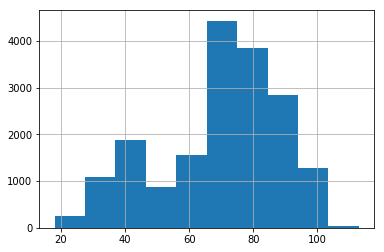

In [103]:
df['age_built'].hist()

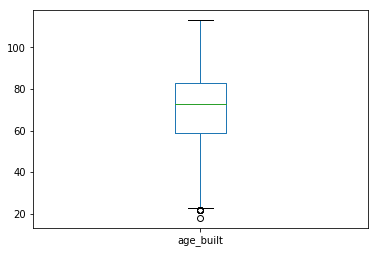

In [104]:
df['age_built'].plot(kind='box')

In [105]:
df['age_built'].describe()

count    18094.000000
mean        69.462861
std         18.923710
min         18.000000
25%         59.000000
50%         73.000000
75%         83.000000
max        113.000000
Name: age_built, dtype: float64

In [106]:
df['Household Key'].describe()

count    2.134400e+04
mean     1.597040e+07
std      2.138079e+07
min      8.750000e+02
25%      4.350387e+06
50%      9.811235e+06
75%      1.654012e+07
max      1.000791e+08
Name: Household Key, dtype: float64

In [107]:
household_groupped = df.groupby('Household Key')[['age_built','Total Cost']].mean()

In [108]:
household_groupped

,age_built,Total Cost
Household Key,,
875.0,51.058824,75.942857
969.0,63.000000,56.525000
3338.0,90.000000,NaN
8718.0,68.000000,NaN
11524.0,63.500000,58.850000
13422.0,64.000000,39.616667
19747.0,95.000000,NaN
20469.0,76.230769,44.770833
20850.0,95.500000,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D53A51F4A8>]],
      dtype=object)

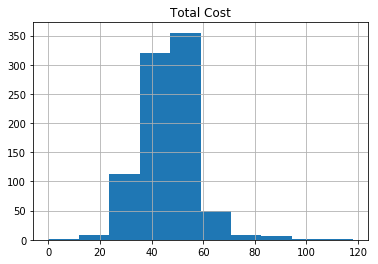

In [109]:
household_groupped.groupby('age_built').mean().hist()

In [110]:
household_groupped.describe()

,age_built,Total Cost
count,4963.000000,3408.000000
mean,75.834483,46.614296
std,14.637376,21.781499
min,18.000000,0.000000
25%,67.000000,34.833333
50%,76.500000,49.066389
75%,87.225000,53.000000
max,108.000000,588.000000


In [111]:
individual_groupped = df.groupby('Individual Key')[['age_built','Total Cost']].mean()

In [112]:
individual_groupped.describe()

,age_built,Total Cost
count,9194.000000,4956.000000
mean,71.358934,46.662158
std,18.653233,21.695904
min,18.000000,0.000000
25%,63.000000,33.250000
50%,74.000000,51.000000
75%,85.000000,53.000000
max,113.000000,588.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D53A5A9278>]],
      dtype=object)

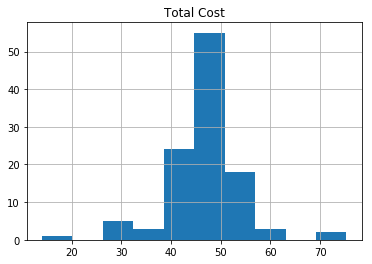

In [113]:
individual_groupped.groupby('age_built').mean().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D53A5A99B0>]],
      dtype=object)

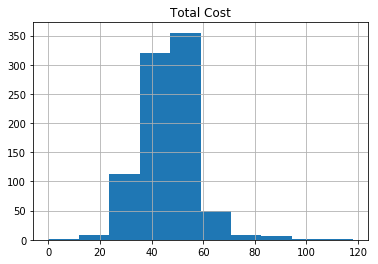

In [114]:
household_groupped.groupby('age_built').mean().hist()

In [115]:
individual_groupped

,age_built,Total Cost
Individual Key,,
17293.0,92.0,NaN
19897.0,54.0,55.750000
19918.0,NaN,NaN
19943.0,77.0,58.850000
19959.0,76.0,NaN
40801.0,76.0,NaN
64060.0,73.0,NaN
64091.0,72.0,NaN
80381.0,90.0,NaN


# Conclusion: While considering the total cost of grouping  based on household key and individual key,  we can see that young customers makes less incidents and so less total cost in histogram. When the average household age considers, the most cost comes from more aged customers.

In [116]:
df['Credit Ranges'].value_counts()

750-799       4101
700-749       2542
650-699       1911
800+          1785
600-649        883
Unknown        414
550-599        197
500-549        165
499 & Less      12
Name: Credit Ranges, dtype: int64

In [117]:
df.groupby('Credit Ranges')['Total Cost'].mean()

Credit Ranges
499 & Less    47.812500
500-549       50.222340
550-599       54.188418
600-649       46.334104
650-699       46.927304
700-749       47.592103
750-799       47.013935
800+          49.582599
Unknown       48.444103
Name: Total Cost, dtype: float64

# Conclusion: Based on the credit ranges of customers, we cn see that most customers falls in the group of 750-799. But is it doesn't change the average cost of other groups, and it seems to be same for all most all groups. Only the group 550-599 has some significant average cost.


In [118]:
df['kcl_B_IND_MosaicsGrouping'].value_counts()

Autumn Years                2934
Booming with Confidence     2412
Golden Year Guardians       2099
Thriving Boomers            1663
Blue Sky Boomers            1001
Surburban Style              931
Power Elite                  916
Flourishing Families         752
Singles and Starters         737
Family Union                 591
Middle Class Melting Pot     549
Promising Families           356
Significant Singles          349
Young City Solos             177
Cultural Connections         162
Economic Challenges          116
Aspirational Fusion           90
Families in Motion            25
Pastoral Pride                21
Name: kcl_B_IND_MosaicsGrouping, dtype: int64

In [119]:
df.groupby('kcl_B_IND_MosaicsGrouping')['Total Cost'].mean()

kcl_B_IND_MosaicsGrouping
Aspirational Fusion         51.519138
Autumn Years                47.261838
Blue Sky Boomers            47.647917
Booming with Confidence     48.366323
Cultural Connections        44.453689
Economic Challenges         50.013043
Families in Motion          49.487059
Family Union                45.428541
Flourishing Families        48.845640
Golden Year Guardians       46.265855
Middle Class Melting Pot    50.484960
Pastoral Pride              71.812500
Power Elite                 49.779392
Promising Families          43.094527
Significant Singles         48.080170
Singles and Starters        45.544367
Surburban Style             46.423783
Thriving Boomers            47.424082
Young City Solos            50.169626
Name: Total Cost, dtype: float64

# Similary the mosaic grouping " Pastoral Pride"  is significantly involved in incidents and cases and so generated high average value like 71.


Convert all columns starts with FSV to 0 and 1 and do get_dummies action on these columns

# The purpose of below exercise is to see whehter the mosaic features influce the FSV Credit Card Flag.  We will prepare the data and do logistics regression to see the effect.

In [120]:
[ i for i in df.columns if i.startswith('FSV')]

['FSV CMSI Flag',
 'FSV Credit Card Flag',
 'FSV Deposit Program Flag',
 'FSV Home Equity Flag',
 'FSV ID Theft Flag',
 'FSV Mortgage Flag']

In [121]:
for col in ['FSV CMSI Flag',
 'FSV Credit Card Flag',
 'FSV Deposit Program Flag',
 'FSV Home Equity Flag',
 'FSV ID Theft Flag',
 'FSV Mortgage Flag']: 
    df[col] = df[col].apply(y_n_to_binary)

In [122]:
df_exp = pd.get_dummies(df, columns = ['kcl_B_IND_MosaicsGrouping'])

In [123]:
df_exp

,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,...,kcl_B_IND_MosaicsGrouping_Golden Year Guardians,kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot,kcl_B_IND_MosaicsGrouping_Pastoral Pride,kcl_B_IND_MosaicsGrouping_Power Elite,kcl_B_IND_MosaicsGrouping_Promising Families,kcl_B_IND_MosaicsGrouping_Significant Singles,kcl_B_IND_MosaicsGrouping_Singles and Starters,kcl_B_IND_MosaicsGrouping_Surburban Style,kcl_B_IND_MosaicsGrouping_Thriving Boomers,kcl_B_IND_MosaicsGrouping_Young City Solos
Individual Key,,,,,,,,,,,,,,,,,,,,,
10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [124]:
household_grouped = df_exp.groupby('Household Key').mean()

In [125]:
def buy_or_not(x):
    if x > 0:
        return 1
    else:
        return 0

In [126]:
fsvs = [col for col in household_grouped.columns if col.startswith('FSV')]

In [127]:
for col in fsvs:
    household_grouped[col] = household_grouped[col].apply(buy_or_not)

In [128]:
household_grouped[fsvs].describe()

,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,FSV ID Theft Flag,FSV Mortgage Flag
count,5241.0,5241.000000,5241.000000,5241.000000,5241.000000,5241.0
mean,0.0,0.110284,0.005342,0.001145,0.044839,0.0
std,0.0,0.313274,0.072904,0.033819,0.206970,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [129]:
household_grouped['FSV Credit Card Flag'].value_counts()

0    4663
1     578
Name: FSV Credit Card Flag, dtype: int64

In [130]:
x = household_grouped.drop(fsvs, axis =1)

In [131]:
y = household_grouped['FSV Credit Card Flag']

In [132]:
x.columns

Index(['ZIP5', 'ZIP9', 'Number of Children', 'Length Of Residence',
       'Do Not Direct Mail Solicit', 'Email Available', 'ERS ENT Count Year 1',
       'ERS ENT Count Year 2', 'ERS ENT Count Year 3',
       'ERS Member Cost Year 1', 'ERS Member Cost Year 2',
       'ERS Member Cost Year 3', 'Right_Individual Key', 'Member Key',
       'Member Number Associate ID', 'Member Tenure Years', 'Membership ID',
       'Months from Join to Cancel', 'ZIP', 'Basic Cost',
       'Calculated Tow Miles', 'Dispatch Code2Description', 'Is Duplicate',
       'Is NSR', 'Member Match Flag', 'Member Number and Associate ID',
       'Plus Cost', 'Premier Cost', 'Rec ID', 'Total Cost',
       'Tow Destination Latitude', 'Tow Destination Longitude',
       'Was Duplicated', 'Was Towed To AAR Referral', 'age_built',
       'kcl_B_IND_MosaicsGrouping_Aspirational Fusion',
       'kcl_B_IND_MosaicsGrouping_Autumn Years',
       'kcl_B_IND_MosaicsGrouping_Blue Sky Boomers',
       'kcl_B_IND_MosaicsGrouping_B

In [133]:
y.describe()

count    5241.000000
mean        0.110284
std         0.313274
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: FSV Credit Card Flag, dtype: float64

In [134]:
y

Household Key
875.0          1
969.0          0
3338.0         0
8718.0         0
11524.0        0
13422.0        0
19747.0        0
20469.0        0
20850.0        0
25365.0        0
30007.0        0
37468.0        0
38093.0        0
41756.0        0
43381.0        0
49578.0        0
55047.0        0
55295.0        0
73421.0        0
93896.0        1
94927.0        0
103545.0       1
106487.0       0
115289.0       0
115306.0       0
115346.0       0
115351.0       1
115430.0       0
116806.0       1
117430.0       0
              ..
99800577.0     0
99817387.0     0
99817390.0     0
99839301.0     0
99843098.0     0
99851820.0     0
99873114.0     0
99881116.0     0
99953012.0     0
99987696.0     0
99991498.0     0
99992624.0     0
99992663.0     0
99993288.0     0
99996562.0     0
100004477.0    0
100016608.0    0
100020029.0    0
100022741.0    0
100023243.0    0
100035899.0    0
100053546.0    0
100064720.0    1
100065197.0    0
100067809.0    0
100069201.0    0
100070004.0    0


In [135]:
x

,ZIP5,ZIP9,Number of Children,Length Of Residence,Do Not Direct Mail Solicit,Email Available,ERS ENT Count Year 1,ERS ENT Count Year 2,ERS ENT Count Year 3,ERS Member Cost Year 1,...,kcl_B_IND_MosaicsGrouping_Golden Year Guardians,kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot,kcl_B_IND_MosaicsGrouping_Pastoral Pride,kcl_B_IND_MosaicsGrouping_Power Elite,kcl_B_IND_MosaicsGrouping_Promising Families,kcl_B_IND_MosaicsGrouping_Significant Singles,kcl_B_IND_MosaicsGrouping_Singles and Starters,kcl_B_IND_MosaicsGrouping_Surburban Style,kcl_B_IND_MosaicsGrouping_Thriving Boomers,kcl_B_IND_MosaicsGrouping_Young City Solos
Household Key,,,,,,,,,,,,,,,,,,,,,
875.0,2920.777778,2.920950e+07,NaN,NaN,0.00,0.333333,0.785714,0.428571,0.714286,46.239286,...,0.000000,0.0,0.0,0.777778,0.0,0.000000,0.222222,0.000000,0.000000,0.0
969.0,2919.000000,2.919102e+07,0.000000,14.000000,0.00,0.833333,0.000000,0.666667,1.500000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3338.0,2919.000000,2.919492e+07,1.000000,5.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
8718.0,2910.000000,2.910341e+07,0.000000,15.000000,0.00,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
11524.0,2919.000000,2.919507e+07,1.142857,12.142857,0.00,0.857143,0.333333,2.166667,1.000000,19.616667,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0
13422.0,2816.000000,2.816776e+07,0.000000,15.000000,0.00,0.500000,0.250000,0.000000,0.000000,14.712500,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0
19747.0,2919.000000,2.919363e+07,0.000000,15.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
20469.0,2916.000000,2.916301e+07,0.000000,15.000000,0.00,0.000000,3.692308,0.923077,0.923077,217.292308,...,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
20850.0,2910.000000,2.910193e+07,NaN,NaN,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [136]:
sub_df = household_grouped[['kcl_B_IND_MosaicsGrouping_Aspirational Fusion',
       'kcl_B_IND_MosaicsGrouping_Autumn Years',
       'kcl_B_IND_MosaicsGrouping_Blue Sky Boomers',
       'kcl_B_IND_MosaicsGrouping_Booming with Confidence',
       'kcl_B_IND_MosaicsGrouping_Cultural Connections',
       'kcl_B_IND_MosaicsGrouping_Economic Challenges',
       'kcl_B_IND_MosaicsGrouping_Families in Motion',
       'kcl_B_IND_MosaicsGrouping_Family Union',
       'kcl_B_IND_MosaicsGrouping_Flourishing Families',
       'kcl_B_IND_MosaicsGrouping_Golden Year Guardians',
       'kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot',
       'kcl_B_IND_MosaicsGrouping_Pastoral Pride',
       'kcl_B_IND_MosaicsGrouping_Power Elite',
       'kcl_B_IND_MosaicsGrouping_Promising Families',
       'kcl_B_IND_MosaicsGrouping_Significant Singles',
       'kcl_B_IND_MosaicsGrouping_Singles and Starters',
       'kcl_B_IND_MosaicsGrouping_Surburban Style',
       'kcl_B_IND_MosaicsGrouping_Thriving Boomers',
       'kcl_B_IND_MosaicsGrouping_Young City Solos',
        'FSV Credit Card Flag']]

In [137]:
not_buyers = sub_df.loc[sub_df['FSV Credit Card Flag'] != 1]

In [138]:
buyers = sub_df.loc[sub_df['FSV Credit Card Flag'] == 1]

In [139]:
not_buyers.shape

(4663, 20)

In [140]:
buyers.shape

(578, 20)

# As the number of records in the buyers and not_buyers groups are very different , we will make a new data set that contains equal number of buyers and not_buyers.

In [145]:
buyers.describe()

,kcl_B_IND_MosaicsGrouping_Aspirational Fusion,kcl_B_IND_MosaicsGrouping_Autumn Years,kcl_B_IND_MosaicsGrouping_Blue Sky Boomers,kcl_B_IND_MosaicsGrouping_Booming with Confidence,kcl_B_IND_MosaicsGrouping_Cultural Connections,kcl_B_IND_MosaicsGrouping_Economic Challenges,kcl_B_IND_MosaicsGrouping_Families in Motion,kcl_B_IND_MosaicsGrouping_Family Union,kcl_B_IND_MosaicsGrouping_Flourishing Families,kcl_B_IND_MosaicsGrouping_Golden Year Guardians,kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot,kcl_B_IND_MosaicsGrouping_Pastoral Pride,kcl_B_IND_MosaicsGrouping_Power Elite,kcl_B_IND_MosaicsGrouping_Promising Families,kcl_B_IND_MosaicsGrouping_Significant Singles,kcl_B_IND_MosaicsGrouping_Singles and Starters,kcl_B_IND_MosaicsGrouping_Surburban Style,kcl_B_IND_MosaicsGrouping_Thriving Boomers,kcl_B_IND_MosaicsGrouping_Young City Solos,FSV Credit Card Flag
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.0,578.000000,578.000000,578.000000,578.000000,578.0,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.0
mean,0.003460,0.187580,0.054354,0.111040,0.010813,0.003460,0.0,0.035466,0.020012,0.138033,0.021521,0.0,0.018804,0.016778,0.013264,0.015907,0.034219,0.072558,0.002768,1.0
std,0.058773,0.384428,0.225341,0.309574,0.101930,0.058773,0.0,0.181201,0.132532,0.343927,0.141045,0.0,0.134311,0.124501,0.107117,0.119683,0.177114,0.254168,0.048470,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [146]:
not_buyers.describe()

,kcl_B_IND_MosaicsGrouping_Aspirational Fusion,kcl_B_IND_MosaicsGrouping_Autumn Years,kcl_B_IND_MosaicsGrouping_Blue Sky Boomers,kcl_B_IND_MosaicsGrouping_Booming with Confidence,kcl_B_IND_MosaicsGrouping_Cultural Connections,kcl_B_IND_MosaicsGrouping_Economic Challenges,kcl_B_IND_MosaicsGrouping_Families in Motion,kcl_B_IND_MosaicsGrouping_Family Union,kcl_B_IND_MosaicsGrouping_Flourishing Families,kcl_B_IND_MosaicsGrouping_Golden Year Guardians,kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot,kcl_B_IND_MosaicsGrouping_Pastoral Pride,kcl_B_IND_MosaicsGrouping_Power Elite,kcl_B_IND_MosaicsGrouping_Promising Families,kcl_B_IND_MosaicsGrouping_Significant Singles,kcl_B_IND_MosaicsGrouping_Singles and Starters,kcl_B_IND_MosaicsGrouping_Surburban Style,kcl_B_IND_MosaicsGrouping_Thriving Boomers,kcl_B_IND_MosaicsGrouping_Young City Solos,FSV Credit Card Flag
count,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.0
mean,0.004122,0.130394,0.044878,0.109406,0.008429,0.006731,0.001662,0.019558,0.017926,0.116638,0.021108,0.000429,0.038530,0.015506,0.017848,0.032117,0.033349,0.075200,0.010604,0.0
std,0.063201,0.335553,0.205811,0.310753,0.090401,0.081319,0.040242,0.136797,0.131727,0.319568,0.141626,0.020708,0.190601,0.121526,0.130449,0.174377,0.176758,0.261348,0.101788,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [147]:
X1 = not_buyers.sample(578)

In [148]:
X1.shape

(578, 20)

In [149]:
buyers.shape

(578, 20)

In [150]:
d_df = pd.concat([buyers,X1])

In [151]:
d_df.shape

(1156, 20)

In [152]:
X = d_df[['kcl_B_IND_MosaicsGrouping_Aspirational Fusion',
       'kcl_B_IND_MosaicsGrouping_Autumn Years',
       'kcl_B_IND_MosaicsGrouping_Blue Sky Boomers',
       'kcl_B_IND_MosaicsGrouping_Booming with Confidence',
       'kcl_B_IND_MosaicsGrouping_Cultural Connections',
       'kcl_B_IND_MosaicsGrouping_Economic Challenges',
       'kcl_B_IND_MosaicsGrouping_Families in Motion',
       'kcl_B_IND_MosaicsGrouping_Family Union',
       'kcl_B_IND_MosaicsGrouping_Flourishing Families',
       'kcl_B_IND_MosaicsGrouping_Golden Year Guardians',
       'kcl_B_IND_MosaicsGrouping_Middle Class Melting Pot',
       'kcl_B_IND_MosaicsGrouping_Pastoral Pride',
       'kcl_B_IND_MosaicsGrouping_Power Elite',
       'kcl_B_IND_MosaicsGrouping_Promising Families',
       'kcl_B_IND_MosaicsGrouping_Significant Singles',
       'kcl_B_IND_MosaicsGrouping_Singles and Starters',
       'kcl_B_IND_MosaicsGrouping_Surburban Style',
       'kcl_B_IND_MosaicsGrouping_Thriving Boomers',
       'kcl_B_IND_MosaicsGrouping_Young City Solos' ]]

In [153]:
y = d_df [['FSV Credit Card Flag']]

In [154]:
X.shape

(1156, 19)

In [155]:
y.shape

(1156, 1)

# Applying Logistics Regression model

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train,X_test, y_train, y_test = train_test_split(X,y)

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
lgr = LogisticRegression()

In [161]:
knn = KNeighborsClassifier()

In [162]:
knn.fit(X_train, y_train)

C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [163]:
lgr.fit(X_train, y_train)

C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [164]:
lgr.score(X_test, y_test)

0.5190311418685121

In [165]:
coef_df = pd.DataFrame( { 'coef': lgr.coef_[0], 'feature': X_test.columns})

In [167]:
coef_df

,coef,feature
0,-0.594611,kcl_B_IND_MosaicsGrouping_Aspirational Fusion
1,0.536667,kcl_B_IND_MosaicsGrouping_Autumn Years
2,-0.033830,kcl_B_IND_MosaicsGrouping_Blue Sky Boomers
3,0.319214,kcl_B_IND_MosaicsGrouping_Booming with Confidence
4,-0.249801,kcl_B_IND_MosaicsGrouping_Cultural Connections
5,-0.132287,kcl_B_IND_MosaicsGrouping_Economic Challenges
6,0.000000,kcl_B_IND_MosaicsGrouping_Families in Motion
7,0.637518,kcl_B_IND_MosaicsGrouping_Family Union
8,0.238953,kcl_B_IND_MosaicsGrouping_Flourishing Families
9,0.310161,kcl_B_IND_MosaicsGrouping_Golden Year Guardians


In [166]:
plt.figure(figsize = (25,15))

<Figure size 1800x1080 with 0 Axes>

<Figure size 1800x1080 with 0 Axes>

# Evaluation features using their coefficient values in model

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

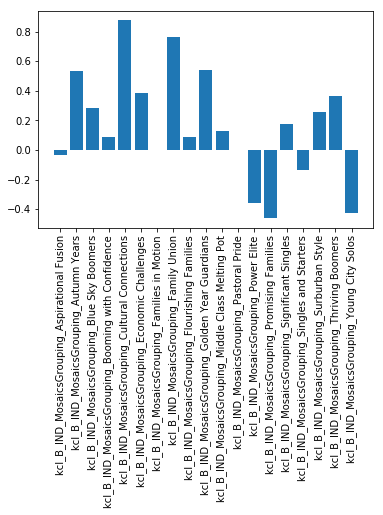

In [106]:
plt.bar( coef_df['feature'], coef_df['coef'])
plt.xticks(rotation = 90)

# For comparison, we can try Gradient Boosting algorithm also

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [113]:
gbc = GradientBoostingClassifier()

In [114]:
gbc.fit(X_train, y_train)

C:\Users\george\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [115]:
gbc.score(X_test, y_test)

0.532871972318339

In [116]:
df

,Household Key,Member Flag,City,State - Grouped,ZIP5,ZIP9,FSV CMSI Flag,FSV Credit Card Flag,FSV Deposit Program Flag,FSV Home Equity Flag,...,SVC Facility Name,SVC Facility Type,Total Cost,Tow Destination Latitude,Tow Destination Longitude,Tow Destination Name,Was Duplicated,Was Towed To AAR Referral,Date,age_built
Individual Key,,,,,,,,,,,,,,,,,,,,,
10000003.0,10462590.0,Y,NEW HAVEN,CT,6511.0,65111349.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,ASTRO WRECKER SERVICE,independent repair,32.50,41.00000,-71.00000,Aar / Johnson's Auto Service,0.0,1.0,2017-04-13,98.0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,Astro Wrecker Service,independent repair,30.00,0.00000,0.00000,NaN,0.0,0.0,2016-07-26,98.0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,ASTRO WRECKER SERVICE,independent repair,32.50,0.00000,0.00000,NaN,0.0,0.0,2017-02-13,98.0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,ASTRO WRECKER SERVICE,independent repair,30.00,0.00000,0.00000,NaN,0.0,0.0,2015-01-29,98.0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,AAA SNE RI LIGHT SERVICE,mobile battery service,53.00,0.00000,0.00000,NaN,0.0,0.0,2015-09-25,98.0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,Astro Wrecker Service,independent repair,30.00,0.00000,0.00000,NaN,0.0,0.0,2016-04-05,98.0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,Astro Wrecker Service,independent repair,32.00,0.00000,0.00000,NaN,0.0,0.0,2016-11-30,98.0
52211550.0,4500791.0,Y,WEST WARWICK,RI,2893.0,28933850.0,0,1,0,0,...,Astro Wrecker Service,independent repair,32.00,0.00000,0.00000,NaN,0.0,0.0,2016-12-16,98.0


# We can see a little improvement in score in Gradient Boosting algorithm 